In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
import mypyslha as pyslha
import glob

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)

## SLHA data

In [2]:
slhaFolder = '../data/slha_BM2'

### Get data

In [3]:
xsecs = {('~CHI1', '~CHI1~') : [], ('LQ', 'LQ~') : [], ('LQ', 'TA') : [], ('LQ~', 'TA') : []}
brPIDs = {r'$S_1 \to \tau + c$' : [42,15,4], 
       r'$S_1 \to \nu + b$' : [42,5,16], 
       r'$S_1 \to \tau + t$' : [42,15,6],  
       r'$S_1 \to \chi_1 + \chi_0$' : [42,5000521,5000522],
       r'$\chi_1 \to \chi_0 + \tau + c$' : [5000521,4,15,5000522],
       r'$\chi_1 \to \chi_0 + \nu + b$' : [5000521,5,16,5000522]      
      }

brs = {r'$S_1 \to \tau + c$' : [], r'$S_1 \to \nu + b$' : [], r'$S_1 \to \tau + c$' : [],  
       r'$S_1 \to \tau + t$' : [],  r'$S_1 \to \chi_1 + \chi_0$' : [], 
       r'$\chi_1 \to \chi_0 + \tau + c$' : [],
       r'$\chi_1 \to \chi_0 + \nu + b$' : []}

masses = {5000521 : [], 5000522 : [], 42 : []}
lambdas = {r'$\lambda_L$' : [], r'$\lambda_R$' : [], r'$y_{DM}$' : []}
for f in glob.glob(slhaFolder+'/*.slha'):
    data = pyslha.readSLHAFile(f)
    if data.blocks['MASS'][5000521] - data.blocks['MASS'][5000522] != 50.:
        continue
    for fpdg in xsecs:
        proc = (2212, 2212) + fpdg
        if not proc in data.xsections:
            xsecs[fpdg] = 0.
        else:
            xsecs[fpdg].append(data.xsections[proc].xsecs[0].value)
    for br,pids in brPIDs.items():
        decList = data.decays[pids[0]].decays
        brVal = 0.
        for dec in decList:
            if sorted(dec.ids) == sorted(pids[1:]):
                brVal = dec.br
                break
        brs[br].append(brVal)
    for pid in masses:
        masses[pid].append(data.blocks['MASS'][pid])
    lambdas[r'$y_{DM}$'].append(data.blocks['DMINPUTS'][1])
    lambdas[r'$\lambda_L$'].append(data.blocks['LQLAML'][(3,3)])
    lambdas[r'$\lambda_R$'].append(data.blocks['LQLAMR'][(2,3)])
    


### Plot Curves

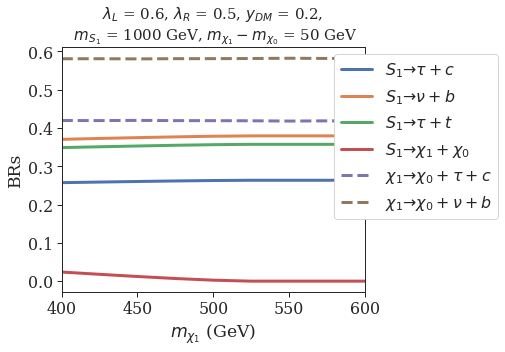

In [6]:
fig = plt.figure(figsize=(7,5))
for br in brs:
    pts = np.array(sorted(zip(masses[5000521],brs[br])))
    if 'S_1' in br:
        plt.plot(pts[:,0],pts[:,1],label=br,linestyle='-',linewidth=3)
    else:
        plt.plot(pts[:,0],pts[:,1],label=br,linestyle='--',linewidth=3)
plt.xlabel(r'$m_{\chi_1}$ (GeV)')
plt.ylabel(r'BRs')
plt.xlim(400.,600.)
# plt.yscale('log')
title = r""
for lamb,val in lambdas.items():
    v = list(set(val))
    if len(v) == 1:
        v = v[0]
    title += "%s = %1.2g, " %(lamb,v)
mS1 = list(set(masses[42]))
if len(mS1) == 1: mS1 = mS1[0]
title += "\n $m_{S_1}$ = %1.4g GeV" %mS1
title += ", $m_{\chi_1} - m_{\chi_0}$ = 50 GeV"
plt.title(title,fontsize=15)
plt.legend(loc=(0.9,0.3),framealpha=1.0)
plt.tight_layout()
plt.savefig('brsBM2.pdf')
plt.show()

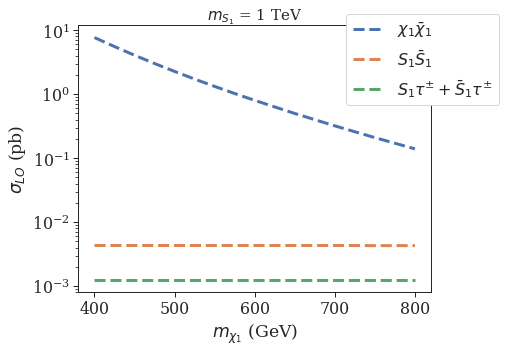

In [11]:
fig = plt.figure(figsize=(7,5))
pts = np.array(sorted(zip(masses[5000521],xsecs[('~CHI1', '~CHI1~')])))
plt.plot(pts[:,0],pts[:,1],linestyle='--',linewidth=3,label=r'$\chi_1 \bar{\chi}_1$')
pts = np.array(sorted(zip(masses[5000521],xsecs[ ('LQ', 'LQ~')])))
plt.plot(pts[:,0],pts[:,1],linestyle='--',linewidth=3,label=r'$S_1 \bar{S}_1$')
pts = np.array(sorted(zip(masses[5000521],np.array(xsecs[('LQ', 'TA')])+np.array(xsecs[('LQ~', 'TA')]))))
plt.plot(pts[:,0],pts[:,1],linestyle='--',linewidth=3,
         label=r'$S_1 \tau^{\pm}+ \bar{S}_1 \tau^{\pm}$')
plt.xlabel(r'$m_{\chi_1}$ (GeV)')
plt.ylabel(r'$\sigma_{LO}$ (pb)')
plt.yscale('log')
plt.legend(loc=(0.76,0.7),framealpha=1.0)
title = "$m_{S_1}$ = %1.4g TeV" %(mS1/1000.)
plt.title(title,fontsize=15)
plt.tight_layout()
plt.savefig('xsecsBM2.pdf')
plt.show()